In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image as img


In [2]:
BRYGGE_SEKVENS = "./bilder/brygge_sekvens"
BRO_SEKVENS = "./bilder/bro_sekvens"
LAGRA_BILDER = ".bilder/lagra_bilete"
RESULT_FOLDER = BRYGGE_SEKVENS

In [3]:
K = np.loadtxt(f"{RESULT_FOLDER}/left/K_matrix.txt")
R = np.loadtxt(f"{RESULT_FOLDER}/left/R_matrix.txt")
T = np.loadtxt(f"{RESULT_FOLDER}/left/T_matrix.txt")

plt.ion()

# Under åpner vi ti = n'te bildet
left_images_filenames = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{RESULT_FOLDER}/left")))
timestamps = list(map(lambda fn: fn.split(".")[0], left_images_filenames))
ti = 0
timestamp = timestamps[ti]
left = cv2.imread(f"{RESULT_FOLDER}/left/{timestamp}.png")
right = cv2.imread(f"{RESULT_FOLDER}/right/{timestamp}.png")
disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)

print("Første:" ,timestamps[0], " Nærme: ", timestamps[len(timestamps)-1])



Første: 1689072633388130541  Nærme:  1689072600363349541


In [4]:
K_bro = np.loadtxt(f"{BRO_SEKVENS}/left/K_matrix.txt")
R_bro = np.loadtxt(f"{BRO_SEKVENS}/left/R_matrix.txt")
T_bro = np.loadtxt(f"{BRO_SEKVENS}/left/T_matrix.txt")

plt.ion()

# Under åpner vi ti = n'te bildet
left_images_filenames_bro = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{BRO_SEKVENS}/left")))
timestamps_bro = list(map(lambda fn: fn.split(".")[0], left_images_filenames_bro))
print("Bro første: ", timestamps_bro[0])

Bro første:  1689068858533971093


In [5]:
timestamp2 = timestamps[len(timestamps)-1]
print(timestamp2)
dispCloseUp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp2}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)

1689072600363349541


In [6]:
K_bro = np.loadtxt(f"{BRO_SEKVENS}/left/K_matrix.txt")
R_bro= np.loadtxt(f"{BRO_SEKVENS}/left/R_matrix.txt")
T_bro = np.loadtxt(f"{BRO_SEKVENS}/left/T_matrix.txt")

plt.ion()

# Under åpner vi ti = n'te bildet
left_images_filenames_bro = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{BRO_SEKVENS}/left")))
timestamps_bro = list(map(lambda fn: fn.split(".")[0], left_images_filenames_bro))
ti_bro = 0
timestampBro = timestamps_bro[ti_bro]
left_bro = cv2.imread(f"{BRO_SEKVENS}/left/{timestampBro}.png")
right_bro = cv2.imread(f"{BRO_SEKVENS}/right/{timestampBro}.png")
disp_bro = np.array(cv2.imread(f"{BRO_SEKVENS}/disp_zed/{timestampBro}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)

[ WARN:0@0.241] global loadsave.cpp:248 findDecoder imread_('./bilder/bro_sekvens/right/1689068858533971093.png'): can't open/read file: check file path/integrity


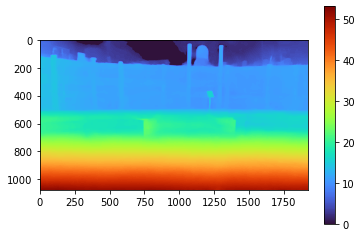

In [7]:
plt.imshow(disp, cmap="turbo")
plt.colorbar()
plt.show()
cv2.destroyAllWindows() 

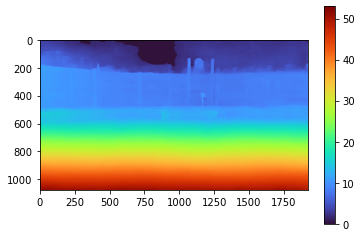

In [8]:
plt.imshow(dispCloseUp, cmap="turbo")
plt.colorbar()
plt.show()
cv2.destroyAllWindows() 

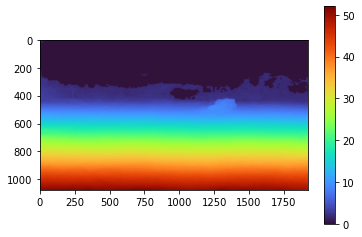

In [9]:
plt.imshow(disp_bro, cmap="turbo")
plt.colorbar()
plt.show()
cv2.destroyAllWindows() 

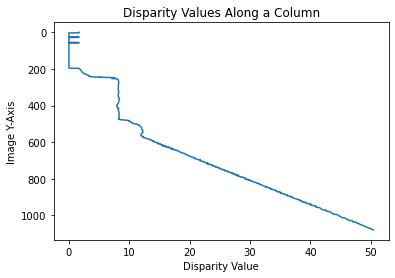

In [10]:
disparity_map = dispCloseUp

column_index = disparity_map.shape[1] // 2

column_data = disparity_map[:, column_index]

y_values = range(len(column_data))

plt.figure()
plt.plot(column_data, y_values)
plt.gca().invert_yaxis()  # Invert y-axis to match image orientation
plt.xlabel('Disparity Value')
plt.ylabel('Image Y-Axis')
plt.title('Disparity Values Along a Column')
plt.show()

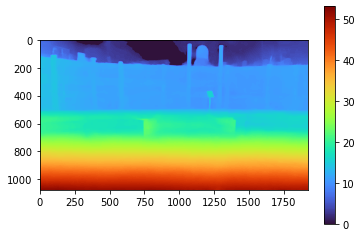

In [11]:
disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
plt.imshow(disp, cmap="turbo")
plt.colorbar()
plt.show()

##### Fetch image


In [12]:

def fetch_image(main_as_well=False, RES_FOLDER=RESULT_FOLDER, time=timestamp):
    K_seclude = np.loadtxt(f"{RES_FOLDER}/left/K_matrix.txt")
    R_seclude = np.loadtxt(f"{RES_FOLDER}/left/R_matrix.txt")
    T_seclude = np.loadtxt(f"{RES_FOLDER}/left/T_matrix.txt")

    plt.ion()
    new_main_image = cv2.imread(f"{RES_FOLDER}/left/{time}.png")
    new_disparity_image = np.array(cv2.imread(f"{RES_FOLDER}/disp_zed/{time}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
    if(main_as_well):
        return new_disparity_image, new_main_image
    return new_disparity_image

##### Interpolation of an image

In [13]:
def interpolate(dispMap, multiplier=2):
    new_width = dispMap.shape[1] * multiplier
    new_height = dispMap.shape[0] * multiplier
    new_dimensions = (new_width, new_height)
    return cv2.resize(dispMap, new_dimensions, interpolation=cv2.INTER_LINEAR)

def display_disp_image(to_be_displayed, title="Image", d_type="turbo"):
    plt.imshow(to_be_displayed, cmap=d_type)
    plt.title(title)
    plt.show()

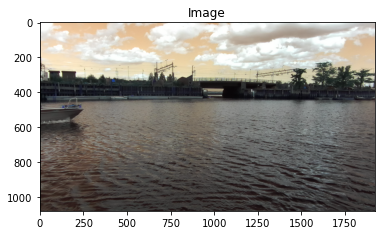

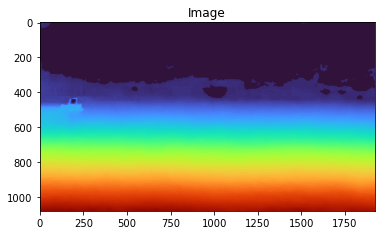

In [14]:
# Første bro tid
tempTimestamp = 1689068851836122093
imgDisp, i = fetch_image(True, RES_FOLDER=BRO_SEKVENS,time=tempTimestamp)
display_disp_image(i)
display_disp_image(imgDisp)

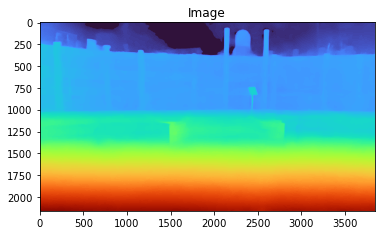

In [15]:
new_disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
new_disp = interpolate(new_disp)
display_disp_image(new_disp)

(3840, 2160)


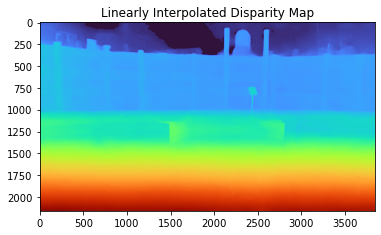

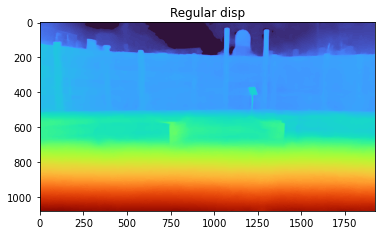

In [16]:

disparity_map = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
# Specify new dimensions (e.g., double the width and height)
new_width = disparity_map.shape[1] * 2
new_height = disparity_map.shape[0] * 2
new_dimensions = (new_width, new_height)
print(new_dimensions)

# Resize with linear interpolation
interpolated_image = cv2.resize(disparity_map, new_dimensions, interpolation=cv2.INTER_LINEAR)

# Save or display the new image
#cv2.imwrite('path/to/save/interpolated_image.png', interpolated_image)

# Optionally, display the image
plt.imshow(interpolated_image, cmap='turbo')
plt.title('Linearly Interpolated Disparity Map')
plt.show()
plt.imshow(disp, cmap='turbo')
plt.title('Regular disp')
plt.show()

##### Below is for plotting disparity as a graph down a single pixel column of an image using the disparity map, regular or interpolated. 

In [17]:
def disparity_graphing(disp_map, col_indices=[500], display=False, even_spaced_triple=False,  title="Disparity Values Along Column(s)"):
    
    plt.figure()
    # Extract and plot each column


    if(even_spaced_triple):
        col_indices = [disp_map.shape[1] // 4, disp_map.shape[1] // 2, 3 * disp_map.shape[1] // 4]
    else:
        for i, col in enumerate(col_indices):
            if(col > disp_map.shape[1]):
                col_indices.pop(i+1)

    for index, col_idx in enumerate(col_indices):
        col_data = disp_map[:, col_idx]
        y_values = range(len(col_data))
        plt.plot(col_data, y_values, label=f'Column {index + 1} (Index {col_idx})')

    # Invert y-axis to match image orientation
    plt.gca().invert_yaxis()

    # Add labels and legend
    plt.xlabel('Disparity Value')
    plt.ylabel('Image Y-Axis')
    plt.title(title)
    plt.legend()

    # Show the plot
    if(display):
        plt.show()

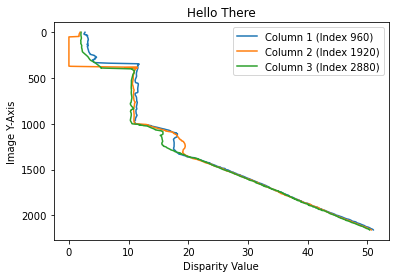

In [18]:
new_disp = np.array(cv2.imread(f"{RESULT_FOLDER}/disp_zed/{timestamp}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
disparity_graphing(interpolate(new_disp), [1000,2000, 3000, 100000000], True, True,"Hello There")


In [19]:
def display_columns_on_image(original_image, even_spaced_triple=False, col_indices=[500], title="Columns on original image"):
    colours = [(255,0,0), (0,255,0), (0,0,255)]
    height = original_image.shape[0]
    width = original_image.shape[1]

    if(even_spaced_triple): 
        col_indices = [original_image.shape[1] // 4, original_image.shape[1] // 2, 3 * original_image.shape[1] // 4]
    else:   
        for i, col in enumerate(col_indices):
            if(col > original_image.shape[1]):
                print("Cols popped")
                col_indices.pop(i+1)

    for index, col_idx in enumerate(col_indices):
        colour = colours[index%3]

        original_image = cv2.line(original_image, (col_indices[index],0), (col_indices[index], height), colour, 3)
        #original_image = cv2.line(original_image, dimStart, dimSlutt, colour, 1)


    display_disp_image(original_image)


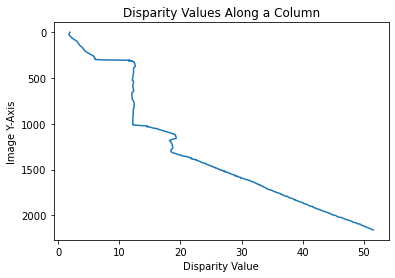

In [20]:
# Plot for the disparity value down a single column of a chosen image 

disparity_map = interpolated_image

#column_index = disparity_map.shape[1] // 2
column_index = 500

column_data = disparity_map[:, column_index]

y_values = range(len(column_data))

plt.figure()
plt.plot(column_data, y_values)
plt.gca().invert_yaxis()  # Invert y-axis to match image orientation
plt.xlabel('Disparity Value')
plt.ylabel('Image Y-Axis')
plt.title('Disparity Values Along a Column')
plt.show()

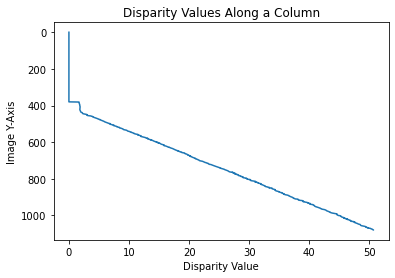

In [21]:
# Plot for the disparity value down a single column of a chosen image 

#column_index = disparity_map.shape[1] // 2
column_index_i = 1200

column_data_i = imgDisp[:, column_index_i]

y_values_i = range(len(column_data_i))

plt.figure()
plt.plot(column_data_i, y_values_i)
plt.gca().invert_yaxis()  # Invert y-axis to match image orientation
plt.xlabel('Disparity Value')
plt.ylabel('Image Y-Axis')
plt.title('Disparity Values Along a Column')
plt.show()

Width and height: 1920 1080


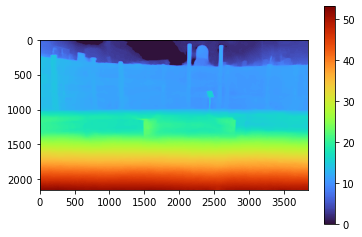

In [22]:
height = disp.shape[0]
width = disp.shape[1]

dims1 = (0, 500)
dims2 = (height, 500)

print("Width and height: " + str(width) + " " +str(height))


#Linje gjennom bildet
#dispImg = cv2.line(disp, dims1, dims2, (0, 255, 0), 1) 
plt.imshow(interpolated_image, cmap="turbo")
plt.colorbar()
plt.show()

[1000, 2000, 3000]


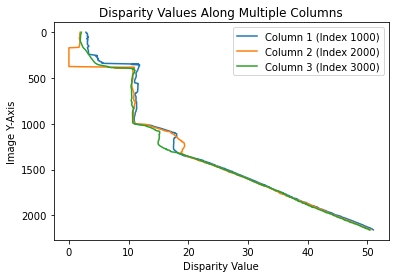

In [23]:

# Load the interpolated disparity map image
#loadImg = 
disparity_map = interpolated_image

# Choose three column indices
# Den øverste av de under er på kvarten, midten og 3 kvarten, mens den underste er bare satt til ett, to og tre tusen

#columns_indices = [disparity_map.shape[1] // 4, disparity_map.shape[1] // 2, 3 * disparity_map.shape[1] // 4]
columns_indices = [1000, 2000, 3000]
print(columns_indices)


# Create a figure for plotting
plt.figure()

# Extract and plot each column
for index, col_idx in enumerate(columns_indices):
    column_data = disparity_map[:, col_idx]
    y_values = range(len(column_data))

    plt.plot(column_data, y_values, label=f'Column {index + 1} (Index {col_idx})')

# Invert y-axis to match image orientation
plt.gca().invert_yaxis()

# Add labels and legend
plt.xlabel('Disparity Value')
plt.ylabel('Image Y-Axis')
plt.title('Disparity Values Along Multiple Columns')
plt.legend()

# Show the plot
plt.show()


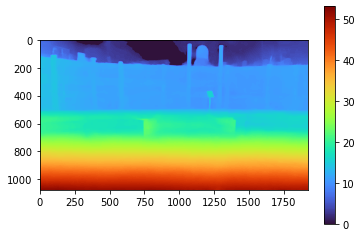

In [24]:
# LAGRING AV BILDER ELLER PLOTS

save_path = "./bilder/lagra_bilete/"
bilde_navn_disp = "disp_closeUp_første.png"
bilde_navn_venstre = "nærme_brygga.png"
mappe = BRYGGE_SEKVENS
index = timestamps[0]

K_lagre = np.loadtxt(f"{mappe}/left/K_matrix.txt")
R_lagre = np.loadtxt(f"{mappe}/left/R_matrix.txt")
T_lagre = np.loadtxt(f"{mappe}/left/T_matrix.txt")
plt.ion()


# Under åpner vi ti = n'te bildet
left_images_filenames_lagring = list(filter(lambda fn: fn.split(".")[-1]=="png", os.listdir(f"{mappe}/left")))
timestamps = list(map(lambda fn: fn.split(".")[0], left_images_filenames_lagring))
left_lagre = cv2.imread(f"{mappe}/left/{index}.png")
right_lagre = cv2.imread(f"{mappe}/right/{index}.png")
dispLagring = np.array(cv2.imread(f"{mappe}/disp_zed/{index}.png", cv2.IMREAD_ANYDEPTH) / 256.0, dtype=np.float32)
plt.imshow(dispLagring, cmap="turbo")
plt.colorbar()
plt.show()

In [25]:

sant = False
if(sant):
    
    lagreBilde = os.path.join(save_path, bilde_navn_disp)
    plt.savefig(lagreBilde)

    
    image = img.open(f"{mappe}/left/{index}.png")
    lagreVenstre = os.path.join(save_path, bilde_navn_venstre)
    image.save(lagreVenstre)

    cv2.destroyAllWindows()

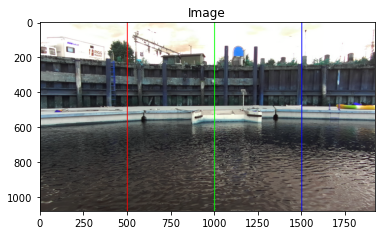

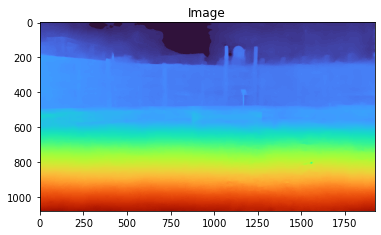

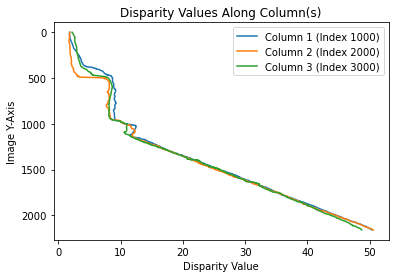

In [26]:
# Timestamps
# Første: 1689072599961543541  Nærme:  1689072633388130541 Bru:  1689068851836122093 Båt: 1689068854381001093
Første= 1689072599961543541  
Nærme=  1689072633388130541
Bru =  1689068851836122093
Båt =  1689068854381001093
 

# Fetch a new current working image and respective disparity
# Dette er disp_første og venstre_første
#current_working_disparity, current_working_image = fetch_image(True)

# Dette er disp_nærme_brygga og nærme_brygga
current_working_disparity, current_working_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS ,time=Første)
første_disparity, første_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS ,time=Første)
nærme_disparity, nærme_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS, time=Nærme)
bru_disparity, bru_image = fetch_image(True, RES_FOLDER=BRO_SEKVENS, time=Bru)

# Display the original image and columns
i1 = 500
i2 = 1000
i3 = 1500 
display_columns_on_image(current_working_image, col_indices=[i1, i2, i3])

# Display the disparity map
display_disp_image(current_working_disparity)

# Display the disparity graph
multi = 2
curr_disp = interpolate(current_working_disparity, multiplier=multi)
disparity_graphing(curr_disp, display=True, even_spaced_triple=False, col_indices=[i1*multi, i2*multi,i3*multi])


##### 1D interpolation

In [27]:
# Function to interpolate a single column
# Input is a processed disparity image
count = 0
def interpolate_column(column):
    # Indices of valid and invalid elements
    # Adds the indices of values that are valid meaning real numbers to valid_indices and invalid indices meaning inf, -inf and NaN to 
    valid_mask = np.isfinite(column)
    valid_indices = np.where(valid_mask)[0]
    invalid_indices = np.where(~valid_mask)[0]

    # Check if we have enough data for interpolation
    if len(valid_indices) == 0:
        # No valid data in this column
        print("No valid data")
        return column
    elif len(invalid_indices) == 0:
        # No need for interpolation
        print("Not Necessary")
        return column

    #count +=1 
    # Interpolate invalid data points
    valid_data = column[valid_mask]
    column[~valid_mask] = np.interp(invalid_indices, valid_indices, valid_data)
    return column

def interpolate_each_column(dI):
    # Applying the interpolation to each column
    height, width = dI.shape
    for x in range(width):
        dI[:, x] = interpolate_column(dI[:, x])

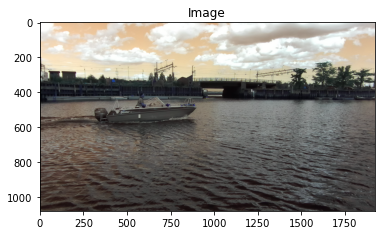

In [28]:
dI_første = current_working_disparity
dI_nærme = nærme_disparity
dI_bru = bru_disparity
dI = dI_bru

båt_test_disp, båt_test_bilde = fetch_image(True, RES_FOLDER=BRO_SEKVENS ,time=Båt)

#interpolate_each_column(dI)
#interpolate_each_column(dI_nærme)
#interpolate_each_column(dI_bru)


display_disp_image(båt_test_bilde)

#interpolate_each_column(båt_test_disp)
#print("Count: ", count)

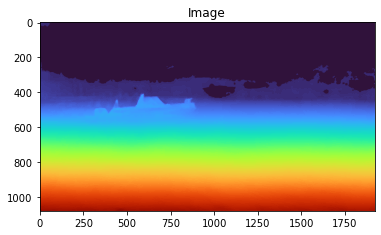

Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Ne

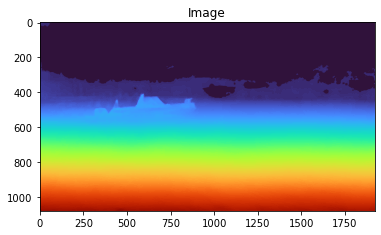

In [29]:
display_disp_image(båt_test_disp)

interpolate_each_column(båt_test_disp)

display_disp_image(båt_test_disp)

In [30]:
""" 
n = 5  # Size of the kernel, as Vipul used in his thesis
kernerl_k = np.ones(n) / n  # Kernel for averaging

# Function to apply low-pass filter to a column
def low_pass_filter(column, K=kernerl_k):
    # Apply convolution
    filtered_column = np.convolve(column, K, mode='same')
    return filtered_column

# Input should be an interpolated disp image
def apply_low_pass_filter(dI):
    height, width = dI.shape
    df = np.zeros_like(dI)  # Low-pass filtered disparity image
    for x in range(width):
        df[:, x] = low_pass_filter(dI[:, x])

# Define the 1D Sobel kernel
kernel_m = np.array([-1, 0, 1])

# Input should be a low-pass filtered interpolated disp image
def sobel_convolving(df):
    # Initialize an array to store the vertical derivative image
    vertical_derivative = np.zeros_like(df)

    # Apply the Sobel kernel to each column
    for i in range(df.shape[1]):  # Iterate over columns
        vertical_derivative[:, i] = np.convolve(df[:, i], kernel_m, mode='same')

    return vertical_derivative

# Input should be a sobel_convolved, low-pass filtered, interpolated disp image
def differentiate_and_pad(df):
    # Computing the derivative of each column
    df_derivative = np.diff(df, axis=0)

    # Padding to handle size difference after np.diff
    df_derivative = np.pad(df_derivative, ((0, 1), (0, 0)), mode='edge')

"""

" \nn = 5  # Size of the kernel, as Vipul used in his thesis\nkernerl_k = np.ones(n) / n  # Kernel for averaging\n\n# Function to apply low-pass filter to a column\ndef low_pass_filter(column, K=kernerl_k):\n    # Apply convolution\n    filtered_column = np.convolve(column, K, mode='same')\n    return filtered_column\n\n# Input should be an interpolated disp image\ndef apply_low_pass_filter(dI):\n    height, width = dI.shape\n    df = np.zeros_like(dI)  # Low-pass filtered disparity image\n    for x in range(width):\n        df[:, x] = low_pass_filter(dI[:, x])\n\n# Define the 1D Sobel kernel\nkernel_m = np.array([-1, 0, 1])\n\n# Input should be a low-pass filtered interpolated disp image\ndef sobel_convolving(df):\n    # Initialize an array to store the vertical derivative image\n    vertical_derivative = np.zeros_like(df)\n\n    # Apply the Sobel kernel to each column\n    for i in range(df.shape[1]):  # Iterate over columns\n        vertical_derivative[:, i] = np.convolve(df[:, i], 

##### The Cell below plots out the correct histograms


Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Necessary
Not Ne

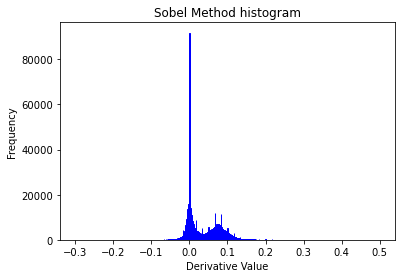

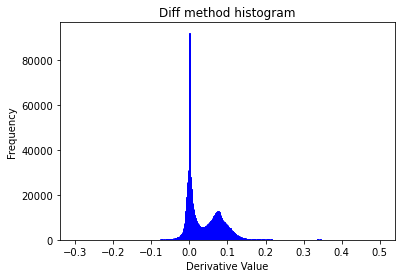

In [31]:
n = 5  # Size of the kernel, as Vipul used in his thesis
kernerl_k = np.ones(n) / n  # Kernel for averaging

# Function to apply low-pass filter to a column
def low_pass_filter(column, K=kernerl_k):
    # Apply convolution
    filtered_column = np.convolve(column, K, mode='same')
    return filtered_column


#
# Velg disparity bilde her!
#
#dI = båt_test_disp
dI = dI_nærme

interpolate_each_column(dI)

# This is manually doing the above cell
# Apply the low-pass filter to each column
height, width = dI.shape
df = np.zeros_like(dI)  # Low-pass filtered disparity image
for x in range(width):
    df[:, x] = low_pass_filter(dI[:, x])


# Versjon 1 bruker sobel Kernel til å derivere
# Define the 1D Sobel kernelS
kernel_m = np.array([1, 0, -1])

# Initialize an array to store the vertical derivative image
vertical_derivative = np.zeros_like(df)

# Apply the Sobel kernel to each column
""" for i in range(df.shape[1]):  # Iterate over columns
    vertical_derivative[:, i] = np.convolve(df[:, i], kernel_m, mode='same') """

for i in range(df.shape[1]):  # Iterate over columns
    vertical_derivative[:, i] = np.convolve(df[:, i], kernel_m, mode='same') / 2



# Versjon 2 bruker np.diff 
# Computing the derivative of each column
df_derivative = np.diff(df, axis=0)

# Padding to handle size difference after np.diff
df_derivative = np.pad(df_derivative, ((0, 1), (0, 0)), mode='edge')
#første_df_derivative = np.pad(df_derivative, ((0, 1), (0, 0)), mode='edge') 



# Input should be a disparity image where each column is differentiated
def flatten_and_plot_histogram(df_derivative, plot=True,title="Histogram of Derivative Values", input_bins=2000):
    # Flatten the array of derivatives to a 1D array
    flattened_derivatives = df_derivative.flatten()

    if(plot):
        # Plot the histogram
        plt.figure()
        plt.hist(flattened_derivatives, bins=input_bins, range=(-0.3,0.5), color='blue', edgecolor='blue')
        plt.title(title)
        plt.xlabel('Derivative Value')
        plt.ylabel('Frequency')
        # Show the plot
        plt.show()
    
    return flattened_derivatives
    

# Versjon 1 Sobel
flattened_derivatives_sobel = flatten_and_plot_histogram(vertical_derivative, title="Sobel Method histogram")

# Versjon 2 np.diff
flattened_derivatives_diff = flatten_and_plot_histogram(df_derivative, title="Diff method histogram")

#flattened_derivatives = flattened_derivatives_sobel

flattened_derivatives = flattened_derivatives_diff

In [32]:
print(vertical_derivative.min())
print(df_derivative.min())

-21.184376
-10.569532


#### An Attempt at SKlearn

In [119]:
from sklearn.cluster import KMeans
from scipy import stats

def gaussian(x, mean, stddev):
    return (1 / (stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / stddev) ** 2)

# Gaussian fit function
def fit_gaussian(data):
    mean = np.mean(data)
    stddev = np.std(data)
    return mean, stddev

def clustering(flattened_derivatives, guess1=[0.0], guess2=[0.06], a_mini=-0.3, a_maxi=0.5, clusters=2):
    # Clipping the data to be between -0.3 and 0.5
    clipped_derivatives = np.clip(flattened_derivatives, a_min=a_mini, a_max=a_maxi)

    # Reshape data for KMeans
    clustering_model = clipped_derivatives.reshape(-1, 1)
    
    # Initial guesses for cluster centers (approximated from histogram peaks)
    initial_centers = np.array([guess1, guess2])  # replace peak1, peak2 with your estimates

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=clusters, init=initial_centers, n_init=1)
    kmeans.fit(clustering_model)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return clustering_model, clipped_derivatives, labels, centers

# Sobel versjon
#clustering_model, labels, centers = clustering(flattened_derivatives_sobel, guess1=[0.0], guess2=[0.15])
# Diff
clustering_model, clipped_derivatives, labels, centers = clustering(flattened_derivatives_diff, guess1=[0.0], guess2=[0.07])

In [134]:


# Bro uten båt
#guess1, guess2 = [-0.01], [0.06]

# Bro med båt midt i bildet
#guess1, guess2 = [0.01], [0.06]

# Bro med båt midt i bildet SOBEL

# Nærme SOBEL
#guess1, guess2 =  [0.0], [0.15]

# Nærme DIFF
guess1, guess2 = [-0.01], [0.040]

# Clipping the data to be between -0.2 and 0.4
clipped_derivatives = np.clip(flattened_derivatives, a_min=-0.3, a_max=0.5)

# Reshape data for KMeans
clustering_model = clipped_derivatives.reshape(-1, 1)
print(type(clustering_model))


# Initial guesses for cluster centers (approximated from histogram peaks)
initial_centers = np.array([guess1, guess2])  # replace peak1, peak2 with your estimates

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1)
kmeans.fit(clustering_model)

# Get the labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_


<class 'numpy.ndarray'>


In [135]:
# Relocation std to make a more accurate distribution

def standardDevMode(m):
    print("Defect")
    #std = np.sqrt(mean(x)) , where x = abs(a - a.mean())**2 .np.abs()
print()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[ 0. ]
 [ 0. ]
 [ 0. ]
 ...
 [-0.3]
 [-0.3]
 [-0.3]]


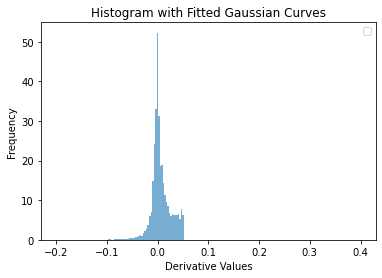

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


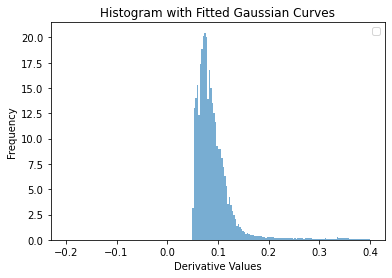

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


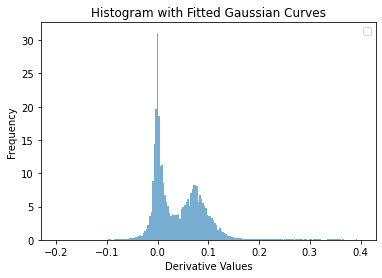

<class 'numpy.ndarray'>
mode:  0.07421875


In [136]:
# Relocation the mean to match the mode for a more accurate distribution

cluster1 = clustering_model[labels == 0]
cluster2 = clustering_model[labels == 1]

print(cluster1)

plt.figure()
plt.hist(cluster1, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

# Plot histogram 
plt.figure()
plt.hist(cluster2, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

plt.figure()
plt.hist(clustering_model, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

mode_result = stats.mode(cluster2)
print(type(mode_result.mode))

print("mode: ", stats.mode(cluster2).mode[0][0])


#print("mean: ",np.mean(cluster1))
#print("mode: ", stats.mode(cluster1).mode)


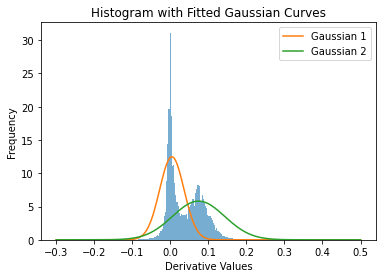

In [131]:
def curve_fitting(clustering_model, clipped_derivatives, labels, plot=True, k=2):
    # Separate the data into two clusters
    cluster1 = clustering_model[labels == 0]
    cluster2 = clustering_model[labels == 1]

    # Fit Gaussian to each cluster
    mean1, stddev1 = fit_gaussian(cluster1)
    mean2, stddev2 = fit_gaussian(cluster2)

    # Calculate range limits for each Gaussian curve
    dL1 = mean1 - k * stddev1
    dU1 = mean1 + k * stddev1
    dL2 = mean2 - k * stddev2
    dU2 = mean2 + k * stddev2

    if(plot):
        # Create a range of x values
        x_values = np.linspace(-0.3, 0.5, 400)

        # Gaussian curves
        gaussian_curve1 = gaussian(x_values, mean1, stddev1)
        gaussian_curve2 = gaussian(x_values, mean2, stddev2)

        # Plot histogram and Gaussian curves
        plt.figure()
        plt.hist(clipped_derivatives, bins=200, range=(-0.3, 0.5), density=True, alpha=0.6)
        plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
        plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
        plt.xlabel('Derivative Values')
        plt.ylabel('Frequency')
        plt.title('Histogram with Fitted Gaussian Curves')
        plt.legend()
        plt.show()
        
    return dL1, dU1, dL2, dU2



# Separate the data into two clusters
cluster1 = clustering_model[labels == 0]
cluster2 = clustering_model[labels == 1]

# Fit Gaussian to each cluster
mean1, stddev1 = fit_gaussian(cluster1)
mean2, stddev2 = fit_gaussian(cluster2)
mean2 = stats.mode(cluster2).mode[0][0]

# Below are the upper and lower bounds
# Assuming you have mean1, stddev1, mean2, stddev2 from the Gaussian fits
k = 4 # Adjust this constant as needed

""" shift_amount = 0.02  # Adjust this value to shift the curve to the left
# Adjust mean2 for Gaussian Curve 2
adjusted_mean2 = mean2 - shift_amount
mean2 = mean2 - shift_amount 
#gaussian_curve2Adjust = gaussian(x_values, adjusted_mean2, stddev2)
"""

# Calculate range limits for each Gaussian curve
dL1 = mean1 - k * stddev1
dU1 = mean1 + k * stddev1
dL2 = mean2 - k * stddev2
dU2 = mean2 + k * stddev2

# Create a range of x values
x_values = np.linspace(-0.3, 0.5, 400)



# Gaussian curves
gaussian_curve1 = gaussian(x_values, mean1, stddev1)
gaussian_curve2 = gaussian(x_values, mean2, stddev2)


# Plot histogram and Gaussian curves
plt.figure()
plt.hist(clipped_derivatives, bins=200, range=(-0.2, 0.4), density=True, alpha=0.6)
plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

#### Assigning each pixel to one of the two curves.

In [36]:

def pixel_classification(df_derivative, dL1, dU1, dL2, dU2):
    # And dL1, dU1, dL2, dU2 are the range limits for the two Gaussians
    classification_map = np.empty(df_derivative.shape, dtype=object)

    for i in range(df_derivative.shape[0]):  # Rows
        for j in range(df_derivative.shape[1]):  # Columns
            derivative_value = df_derivative[i, j]

            # Check if the derivative value falls into the range of either Gaussian
            if dL1 <= derivative_value <= dU1:
                classification = 'upright'
            elif dL2 <= derivative_value <= dU2:
                classification = 'horizontal'
            else:
                classification = 'unknown'

            classification_map[i, j] = classification

    return classification_map

# And dL1, dU1, dL2, dU2 are the range limits for the two Gaussians
classification_map = np.empty(df_derivative.shape, dtype=object)

for i in range(df_derivative.shape[0]):  # Rows
    for j in range(df_derivative.shape[1]):  # Columns
        derivative_value = df_derivative[i, j]

        # Check if the derivative value falls into the range of either Gaussian
        if dL1 <= derivative_value <= dU1:
            classification = 'upright'
        elif dL2 <= derivative_value <= dU2:
            classification = 'horizontal'
        else:
            classification = 'unknown'

        classification_map[i, j] = classification


In [176]:
print(df_derivative)
print(classification_map)
#print(len(clipped_derivatives))
#print(df_derivative)

[[  1.2304685    1.2296877    1.2304685  ...   0.8351562    0.86953115
    0.90234375]
 [  1.234375     1.2328124    1.233594   ...   0.8062501    0.8359375
    0.86484385]
 [  0.02031279   0.01796865   0.01484394 ...  -0.13984394  -0.1656251
   -0.18515635]
 ...
 [-10.533592   -10.5242195  -10.5070305  ...  -9.964844    -9.967968
   -9.965626  ]
 [-10.569532   -10.558594   -10.532814   ...  -9.974998    -9.985939
   -9.995312  ]
 [-10.569532   -10.558594   -10.532814   ...  -9.974998    -9.985939
   -9.995312  ]]
[['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['upright' 'upright' 'upright' ... 'unknown' 'unknown' 'unknown']
 ...
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']]


#### Displaying the upright and horizontal surfaces

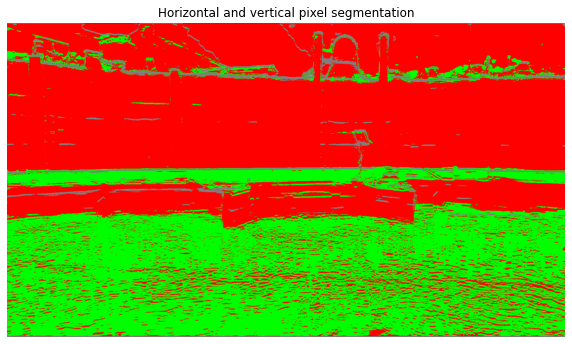

In [37]:
# Define colors for each classification
colors = {
    'upright': [1, 0, 0],  # Red
    #'horizontal': [0, 0, 1],  # Blue
    'horizontal': [0, 1, 0],  # Green
    'unknown': [0.5, 0.5, 0.5]  # Gray
}

def assign_colours_and_plot(classification_map, colors=colors, plot=True, title="Pixel-wise Disparity Map Classification"):
    # Create an empty array for the color-coded image
    color_coded_image = np.zeros((*classification_map.shape, 3))

    # Assign colors
    for classification, color in colors.items():
        mask = classification_map == classification
        color_coded_image[mask] = color

    if(plot):
        plt.figure(figsize=(10, 6))
        plt.imshow(color_coded_image)
        plt.title(title)
        plt.axis('off')  # Hide the axes
        plt.show()

# Nærme
#display_disp_image(nærme_image)
# Båt
#display_disp_image(båt_test_bilde)
assign_colours_and_plot(classification_map, title="Horizontal and vertical pixel segmentation")

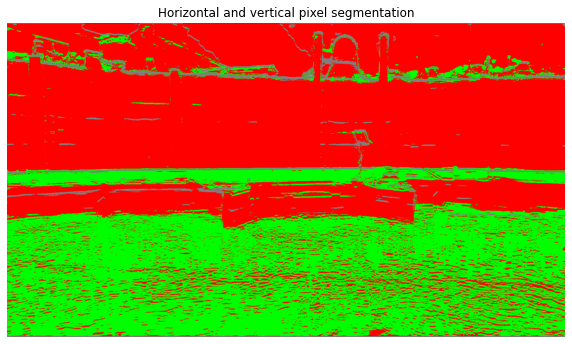

In [38]:

assign_colours_and_plot(classification_map, title="Horizontal and vertical pixel segmentation")

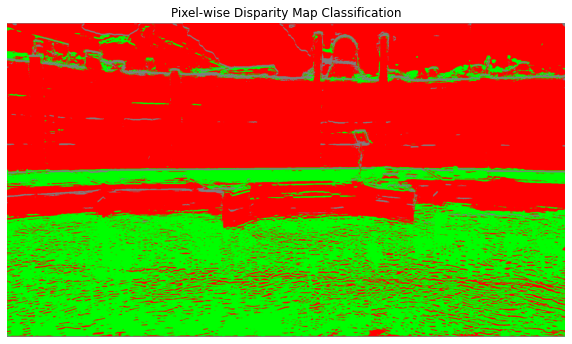

In [39]:
# Define colors for each classification
colors = {
    'upright': [1, 0, 0],  # Red
    #'horizontal': [0, 0, 1],  # Blue
    'horizontal': [0, 1, 0],  # Green
    'unknown': [0.5, 0.5, 0.5]  # Gray
}

def assign_colours_and_plot(classification_map, colors=colors, plot=True):
    # Create an empty array for the color-coded image
    color_coded_image = np.zeros((*classification_map.shape, 3))

    # Assign colors
    for classification, color in colors.items():
        mask = classification_map == classification
        color_coded_image[mask] = color

    if(plot):
        plt.figure(figsize=(10, 6))
        plt.imshow(color_coded_image)
        plt.title('Pixel-wise Disparity Map Classification')
        plt.axis('off')  # Hide the axes
        plt.show()

assign_colours_and_plot(classification_map)

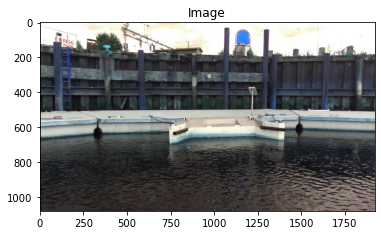

In [40]:
display_disp_image(nærme_image)

# Surface splitting and relabeling

Here I will further split the surfaces into different vertical and horizontal surfaces so that, as an example, in the image above, the green pixels belonging to the water surface would have different horizontal label from the ones on the dock.

In [234]:
#print(classification_map)
#print(len(clipped_derivatives))

# Vi trenger classification map og df_derivative

# Df derivative is the matrix with all the vertical derivative values of the disparity of a pixel.
print((df_derivative.shape))
print(((classification_map).shape)[0])
print(df_derivative[0][0])

print(type(classification_map))


surface_splitting_disparity_image = dispCloseUp


vertCount = 0
horCount = 0
noneCount = 0

# Verticals
vertical_Derivative_List = []
vertical_Disp_List = []
vertical_Obj_List = []


#Horizonals
horizontal_Derivative_List = []
horizontal_Disp_List = []
horizontal_Obj_List = []


for i in range(classification_map.shape[0]):  # Rows
    for j in range(classification_map.shape[1]):  # Columns

        current_local_value = classification_map[i, j]

        if(current_local_value == 'upright'):
            vertCount += 1
            vertical_Derivative_List.append(df_derivative[i,j])
            appendObjectVert = [surface_splitting_disparity_image[i, j], i, j, 'label']
            vertical_Disp_List.append(surface_splitting_disparity_image[i,j])
            vertical_Obj_List.append(appendObjectVert)
        
        
        
        elif(current_local_value == 'horizontal'):
            horCount += 1
            horizontal_Derivative_List.append(df_derivative[i,j])
            appendObjectHor = [surface_splitting_disparity_image[i, j], i, j, 'horizontal']
            horizontal_Disp_List.append(surface_splitting_disparity_image[i,j])
            horizontal_Obj_List.append(appendObjectHor)

        else:
            noneCount+=1

print("verticals: ", vertCount)
print("Horizontals: ", horCount)
print("Unknown: ", noneCount)

""" 
for i in range(classification_map.shape[0]):  # Rows
    for j in range(classification_map.shape[1]):  # Columns

        current_local_value = classification_map[i, j]

        if(current_local_value == 'upright'):
            verticalList.append(df_derivative[i,j]) """




(1080, 1920)
1080
1.2304685
<class 'numpy.ndarray'>
verticals:  1210040
Horizontals:  799527
Unknown:  64033


" \nfor i in range(classification_map.shape[0]):  # Rows\n    for j in range(classification_map.shape[1]):  # Columns\n\n        current_local_value = classification_map[i, j]\n\n        if(current_local_value == 'upright'):\n            verticalList.append(df_derivative[i,j]) "

In [237]:
#print(surface_splitting_disparity_image[:,500])
#print(vertical_Obj_List[1000])
print(horizontal_Obj_List[1000])

[2.1953125, 46, 1051, 'horizontal']


### Vertical reclassification


1210040


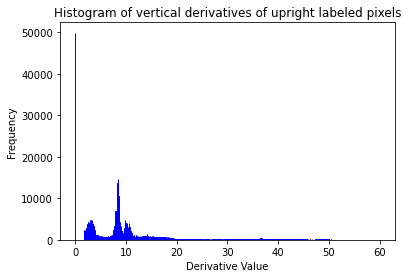

In [106]:
print(len(vertical_Derivative_List))

input_bins=2000
plot= True
title = 'Histogram of vertical derivatives of upright labeled pixels'
histRange = (-0.3,0.5)

#to_be_plotted = verticalDerivativeList
#to_be_plotted = df_derivative.flatten()
to_be_plotted =vertical_Disp_List
histRange = (0,60)
if(plot):
    # Plot the histogram
    plt.figure()
    plt.hist(to_be_plotted, bins=input_bins, range=histRange, color='blue', edgecolor='blue')
    plt.title(title)
    plt.xlabel('Disparity Value')
    plt.ylabel('Frequency')
    # Show the plot
    plt.show()


## Clustering vertical pixels 

Use histogram above to determine clusters and initial guesses

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


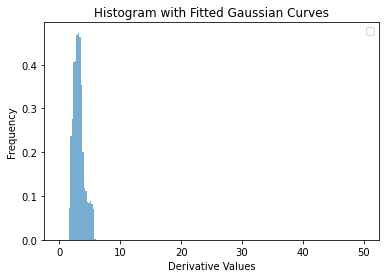

In [171]:
# Already implemented
#def gaussian(x, mean, stddev):
#    return (1 / (stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / stddev) ** 2)

# Already implemented
#def fit_gaussian(data):
#    mean = np.mean(data)
#    stddev = np.std(data)
#    return mean, stddev

def clusteringVerticalSurfaces(flattened_derivatives, guess1=[0.0], guess2=[3], guess3=[6], guess4=[10], a_mini=-0.3, a_maxi=12, clusters=4, onlyThree=False):
    # Clipping the data to be between -0.3 and 0.5
    clipped_derivatives = np.clip(flattened_derivatives, a_min=a_mini, a_max=a_maxi)

    # Reshape data for KMeans
    clustering_model = clipped_derivatives.reshape(-1, 1)
    
    # Initial guesses for cluster centers (approximated from histogram peaks)
    if(onlyThree):
        initial_centers = np.array([guess1, guess2, guess3])
        clusters = 3
    else: 
        initial_centers = np.array([guess1, guess2, guess3, guess4])  # replace peak1, peak2 with your estimates

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=clusters, init=initial_centers, n_init=1)
    kmeans.fit(clustering_model)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return clustering_model, clipped_derivatives, labels, centers

# Sobel versjon
#clustering_model, labels, centers = clustering(flattened_derivatives_sobel, guess1=[0.0], guess2=[0.15])
# Diff
doOnlyThree = False
clustering_model, clipped_derivatives, labels, centers = clusteringVerticalSurfaces(vertical_Disp_List, onlyThree = doOnlyThree)

# Separate the data into two clusters
cluster1 = clustering_model[labels == 0]
cluster2 = clustering_model[labels == 1]
cluster3 = clustering_model[labels == 2]
if(not doOnlyThree):
    cluster4 = clustering_model[labels == 3]

""" 
# Fit Gaussian to each cluster
mean1, stddev1 = fit_gaussian(cluster1)
mean2, stddev2 = fit_gaussian(cluster2)
mean2 = stats.mode(cluster2).mode[0][0]

# Below are the upper and lower bounds
# Assuming you have mean1, stddev1, mean2, stddev2 from the Gaussian fits
k = 4 # Adjust this constant as needed

# Calculate range limits for each Gaussian curve
dL1 = mean1 - k * stddev1
dU1 = mean1 + k * stddev1
dL2 = mean2 - k * stddev2
dU2 = mean2 + k * stddev2

# Create a range of x values
x_values = np.linspace(-0.3, 0.5, 400)



# Gaussian curves
gaussian_curve1 = gaussian(x_values, mean1, stddev1)
gaussian_curve2 = gaussian(x_values, mean2, stddev2)


"""
# Plot histogram and Gaussian curves
plt.figure()
plt.hist(cluster2, bins=200, range=(0, 50), density=True, alpha=0.6)
#plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
#plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()


In [194]:
print(len(labels))
print(len(vertical_Obj_List))

""" 
label 0 = "vertical1"
label 1 = "vertical2"
label 2 = "vertical3"
label 3 = "vertical4"

"""

for i, obj in enumerate(vertical_Obj_List):
    if(labels[i] == 0):
        obj[3] = "vertical1"
    elif(labels[i] == 1):
        obj[3] = "vertical2"
    elif(labels[i] == 2):
        obj[3] = "vertical3"
    else:
        obj[3] = "vertical4"

    #print(obj[3])
    #print("Object: ",obj[3])
    #print("label: ",labels[i])


1210040
1210040


In [205]:
#print(verticalObjList[0])
#print(classification_map)


print(classification_map[1,100])

new_class_map = np.copy(classification_map)

for i, obj in enumerate(vertical_Obj_List):
    i = obj[1]
    j= obj[2]
    new_class_map[i,j] = obj[3]


unknown


In [206]:
print(new_class_map)

[['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['vertical2' 'vertical2' 'vertical2' ... 'unknown' 'unknown' 'unknown']
 ...
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']]


### Assigning new colours to the verticals

{'vertical1': [1, 0, 0], 'vertical2': [0.8, 0, 0], 'vertical3': [0.5, 0, 0], 'vertical4': [0.2, 0, 0], 'horizontal': [0, 1, 0], 'unknown': [0.5, 0.5, 0.5]}


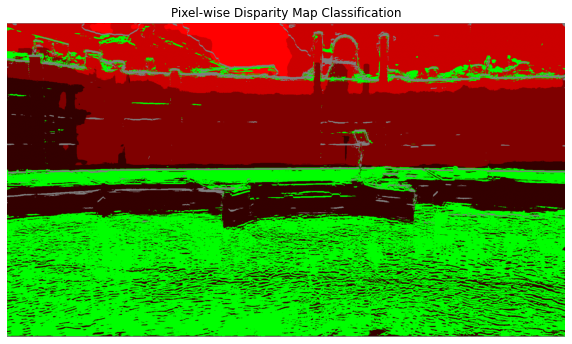

In [233]:
# Define colors for each classification
colorsV2 = {
    'vertical1': [1, 0, 0],  # Pure red
    'vertical2': [0.8, 0, 0],  # Slightly darker shade of red
    'vertical3': [0.5, 0, 0],  # Even darker shade of red
    'vertical4': [0.2, 0, 0],  # Darker shade of red
    'horizontal': [0, 1, 0],  # Green
    'unknown': [0.5, 0.5, 0.5]  # Gray
}
print(colorsV2)

# Create an empty array for the color-coded image
color_coded_image = np.zeros((*new_class_map.shape, 3))
#print(color_coded_image)


color_coded_image = np.zeros((*new_class_map.shape, 3))

# Assign colors based on the classification in new_class_map
for label, color in colorsV2.items():
    # Find indices where the current label is present in new_class_map
    indices = np.where(new_class_map == label)
    # Assign the corresponding color to these indices in the color-coded image
    color_coded_image[indices] = color

#print(color_coded_image)
plt.figure(figsize=(10, 6))
plt.imshow(color_coded_image)
plt.title('Pixel-wise Disparity Map Classification')
plt.axis('off')  # Hide the axes
plt.show() 

### Horizontal reclassification

799527


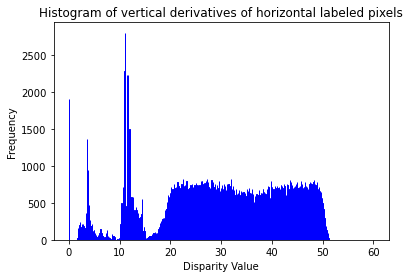

In [240]:
print(len(horizontal_Derivative_List))

input_bins=2000
plot= True
title = 'Histogram of vertical derivatives of horizontal labeled pixels'
histRange = (-0.3,0.5)

#to_be_plotted = verticalDerivativeList
#to_be_plotted = df_derivative.flatten()
to_be_plotted =horizontal_Disp_List
histRange = (0,60)
if(plot):
    # Plot the histogram
    plt.figure()
    plt.hist(to_be_plotted, bins=input_bins, range=histRange, color='blue', edgecolor='blue')
    plt.title(title)
    plt.xlabel('Disparity Value')
    plt.ylabel('Frequency')
    # Show the plot
    plt.show()

## Clustering horizontal pixels 

Use histogram above to determine clusters and initial guesses

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


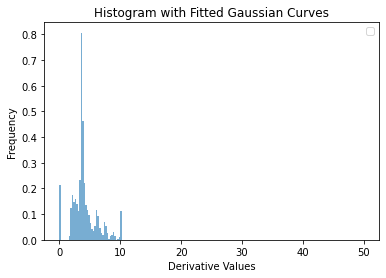

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


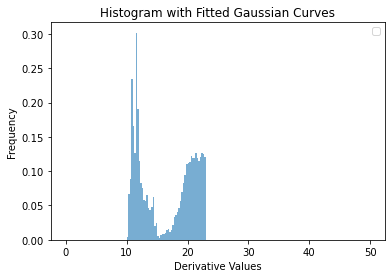

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


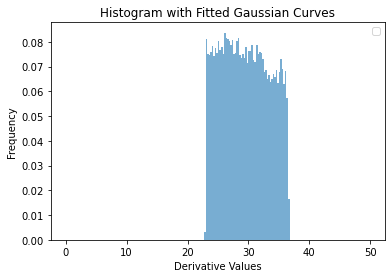

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


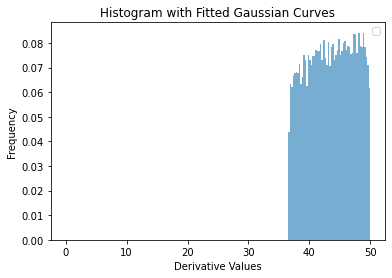

In [282]:
# Already implemented
#def gaussian(x, mean, stddev):
#    return (1 / (stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / stddev) ** 2)

# Already implemented
#def fit_gaussian(data):
#    mean = np.mean(data)
#    stddev = np.std(data)
#    return mean, stddev

def clusteringVerticalSurfaces(flattened_derivatives, guess1=[3], guess2=[7], guess3=[15], guess4=[16], a_mini=-0.3, a_maxi=55, clusters=4, onlyThree=False):
    # Clipping the data to be between -0.3 and 0.5
    clipped_derivatives = np.clip(flattened_derivatives, a_min=a_mini, a_max=a_maxi)

    # Reshape data for KMeans
    clustering_model = clipped_derivatives.reshape(-1, 1)
    
    # Initial guesses for cluster centers (approximated from histogram peaks)
    if(onlyThree):
        initial_centers = np.array([guess1, guess2, guess3])
        clusters = 3
    else: 
        initial_centers = np.array([guess1, guess2, guess3, guess4])  # replace peak1, peak2 with your estimates

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=clusters, init=initial_centers, n_init=1)
    kmeans.fit(clustering_model)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    return clustering_model, clipped_derivatives, labels, centers

# Sobel versjon
#clustering_model, labels, centers = clustering(flattened_derivatives_sobel, guess1=[0.0], guess2=[0.15])
# Diff
doOnlyThree = False
clustering_model, clipped_derivatives, labels, centers = clusteringVerticalSurfaces(horizontal_Disp_List, onlyThree = doOnlyThree)

# Separate the data into two clusters
cluster1 = clustering_model[labels == 0]
cluster2 = clustering_model[labels == 1]
cluster3 = clustering_model[labels == 2]
if(not doOnlyThree):
    cluster4 = clustering_model[labels == 3]

# Plot histogram and Gaussian curves
plt.figure()
plt.hist(cluster1, bins=200, range=(0, 50), density=True, alpha=0.6)
#plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
#plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

# Plot histogram and Gaussian curves
plt.figure()
plt.hist(cluster2, bins=200, range=(0, 50), density=True, alpha=0.6)
#plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
#plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

# Plot histogram and Gaussian curves
plt.figure()
plt.hist(cluster3, bins=200, range=(0, 50), density=True, alpha=0.6)
#plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
#plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
plt.xlabel('Derivative Values')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Gaussian Curves')
plt.legend()
plt.show()

if(not doOnlyThree):
    # Plot histogram and Gaussian curves
    plt.figure()
    plt.hist(cluster4, bins=200, range=(0, 50), density=True, alpha=0.6)
    #plt.plot(x_values, gaussian_curve1, label='Gaussian 1')
    #plt.plot(x_values, gaussian_curve2, label='Gaussian 2')
    plt.xlabel('Derivative Values')
    plt.ylabel('Frequency')
    plt.title('Histogram with Fitted Gaussian Curves')
    plt.legend()
    plt.show()



#### _________________________________________________________________________________________________________________________
#### FULL RUN AND PLOTTING OF EVERYTHING:
#### _________________________________________________________________________________________________________________________


In [42]:
# Full run to be added here

#### _________________________________________________________________________________________________________________________

In [43]:
current_working_disparity, current_working_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS ,time=Første)
nærme_disparity, nærme_image = fetch_image(True, RES_FOLDER=BRYGGE_SEKVENS, time=Nærme)
bru_disparity, bru_image = fetch_image(True, RES_FOLDER=BRO_SEKVENS, time=Bru)
båt_disparity, båt_imgae = fetch_image(True,RES_FOLDER=BRO_SEKVENS, time=Båt)

def full_display(current_working_disparity, current_working_image):
    # Display the original image and columns
    i1 = 500
    i2 = 1000
    i3 = 1500 
    display_columns_on_image(current_working_image, col_indices=[i1, i2, i3])

    # Display the disparity map
    display_disp_image(current_working_disparity)

    # Display the disparity graph
    multi = 2
    curr_disp = interpolate(current_working_disparity, multiplier=multi)
    disparity_graphing(curr_disp, display=True, even_spaced_triple=False, col_indices=[i1*multi, i2*multi,i3*multi])


# Defekt as of now
""" def perform_everything(disparity_img, plot=False, g1=[0.0], g2=[0.7], convolve=False):
    
    interpolate_each_column(disparity_img)
    apply_low_pass_filter(disparity_img)
    disparity_img = sobel_convolving(disparity_img)
    differentiate_and_pad(disparity_img)

    flattened_derivatives = flatten_and_plot_histogram(disparity_img, plot=plot)

    clustering_model, labels, centers = clustering(flattened_derivatives, guess1=g1, guess2=g2)

    dL1, dU1, dL2, dU2 = curve_fitting(clustering_model, labels, plot=plot)

    classification_map = pixel_classification(disparity_img, dL1, dU1, dL2, dU2)

    assign_colours_and_plot(classification_map, plot=plot) """

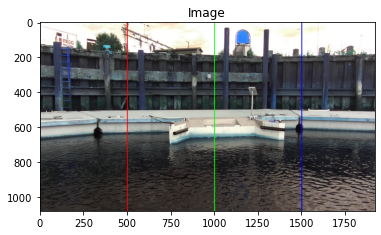

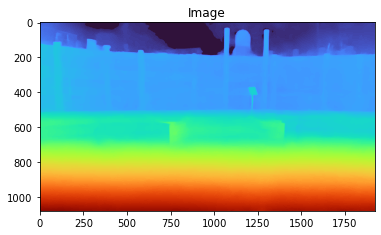

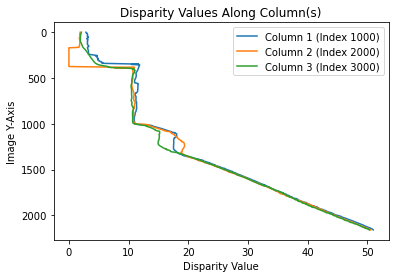

In [44]:
full_display(nærme_disparity, nærme_image)

In [107]:
#full_display(nærme_disparity, nærme_image)
#perform_everything(nærme_disparity, plot=True)

In [ ]:
disparity_img= bru_disparity
plot = True
g1 = [0.1]
g2 = [0.04]

interpolate_each_column(disparity_img)
apply_low_pass_filter(disparity_img)
differentiate_and_pad(disparity_img)


flattened_derivatives = flatten_and_plot_histogram(disparity_img, plot=plot, input_bins=200)


: 

In [ ]:

clustering_model, labels, centers = clustering(flattened_derivatives, guess1=g1, guess2=g2)

dL1, dU1, dL2, dU2 = curve_fitting(clustering_model, labels, plot=plot)

classification_map = pixel_classification(disparity_img, dL1, dU1, dL2, dU2)

assign_colours_and_plot(classification_map, plot=plot)

: 

: 